# **IMPORTING LIBRARIES AND DATASETS**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [74]:
# Read Data
data=pd.read_csv("census.csv", index_col=0)
#data=pd.read_csv("census.csv")        for jupyter notebook
data

,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,
39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K


# **LOOK AT THE DATA**



In [75]:
data.head()

,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,
39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [76]:
data.shape

(45222, 13)

In [77]:
data.columns

Index(['workclass', 'education_level', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 39 to 35
Data columns (total 13 columns):
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), object(9)
memory usage: 4.8+ MB


In [79]:
data.describe()

,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000
mean,10.118460,1101.430344,88.595418,40.938017
std,2.552881,7506.430084,404.956092,12.007508
min,1.000000,0.000000,0.000000,1.000000
25%,9.000000,0.000000,0.000000,40.000000
50%,10.000000,0.000000,0.000000,40.000000
75%,13.000000,0.000000,0.000000,45.000000
max,16.000000,99999.000000,4356.000000,99.000000


# **CLEANING OF DATA**

**Dummy Variables**




In [0]:
# d_columns= ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country','income'] 
# d_data = data[d_columns]

In [0]:
# dummies_data=pd.get_dummies(d_data)

In [0]:
# dummies_data.head()

**LabelEncoder**


In [0]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [0]:
le = LabelEncoder()

In [85]:
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
age,,,,,,,,,
39,5,9,4,0,1,4,1,38,0
50,4,9,2,3,0,4,1,38,0
38,2,11,0,5,1,4,1,38,0
53,2,1,2,5,0,2,1,38,0
28,2,9,2,9,5,2,0,4,0
37,2,12,2,3,5,4,0,38,0
49,2,6,3,7,1,2,0,22,0
52,4,11,2,3,0,4,1,38,1
31,2,12,4,9,1,4,0,38,1


In [86]:
data[categorical_cols].shape

(45222, 9)

In [0]:
f_column=['education-num','capital-gain','capital-loss','hours-per-week']

In [88]:
data[f_column].shape

(45222, 4)

In [0]:
#Concatenating Data (from original Numeric and Transformed-Obeject Data)
new_data=pd.concat([data[f_column],data[categorical_cols]],axis=1)

In [90]:
new_data.head()

,education-num,capital-gain,capital-loss,hours-per-week,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
age,,,,,,,,,,,,,
39,13.0,2174.0,0.0,40.0,5,9,4,0,1,4,1,38,0
50,13.0,0.0,0.0,13.0,4,9,2,3,0,4,1,38,0
38,9.0,0.0,0.0,40.0,2,11,0,5,1,4,1,38,0
53,7.0,0.0,0.0,40.0,2,1,2,5,0,2,1,38,0
28,13.0,0.0,0.0,40.0,2,9,2,9,5,2,0,4,0


In [91]:
new_data.shape

(45222, 13)

# **CORRELATION**


In [92]:
correlation_coefficients = new_data.corr()
correlation_coefficients

,education-num,capital-gain,capital-loss,hours-per-week,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
education-num,1.000000,0.126907,0.081711,0.146206,0.040779,0.347444,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.092994,0.332800
capital-gain,0.126907,1.000000,-0.032102,0.083880,0.034543,0.029889,-0.042399,0.019435,-0.056818,0.014078,0.047444,0.007643,0.221034
capital-loss,0.081711,-0.032102,1.000000,0.054195,0.008233,0.016877,-0.034820,0.015267,-0.058425,0.020955,0.046457,0.005955,0.148687
hours-per-week,0.146206,0.083880,0.054195,1.000000,0.051366,0.060887,-0.183178,0.016160,-0.259194,0.044738,0.231425,0.007554,0.227199
workclass,0.040779,0.034543,0.008233,0.051366,1.000000,0.017846,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.003889,0.015659
education_level,0.347444,0.029889,0.016877,0.060887,0.017846,1.000000,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.077893,0.081196
marital-status,-0.064986,-0.042399,-0.034820,-0.183178,-0.033221,-0.041520,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.022721,-0.192711
occupation,0.089686,0.019435,0.015267,0.016160,0.017508,-0.033499,0.016399,1.000000,-0.051644,-0.000026,0.056625,-0.002848,0.049787
relationship,-0.088431,-0.056818,-0.058425,-0.259194,-0.065049,-0.013179,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.007144,-0.253402
race,0.031655,0.014078,0.020955,0.044738,0.049765,0.011457,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.124342,0.070844


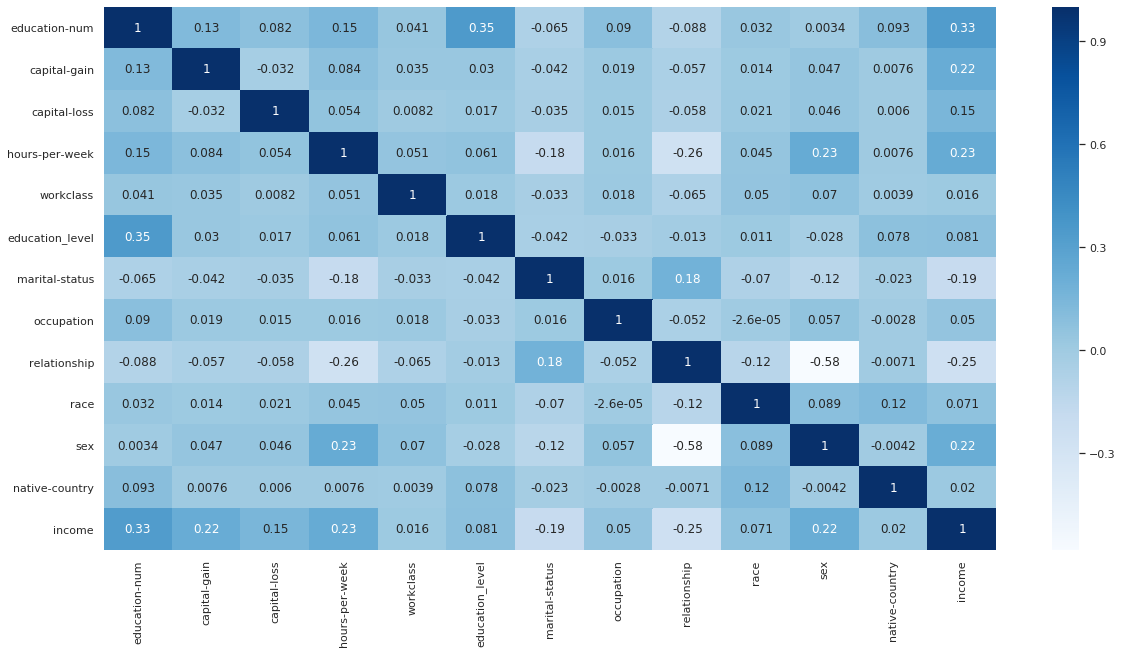

In [93]:
sns.heatmap(correlation_coefficients,annot=True,cmap="Blues")

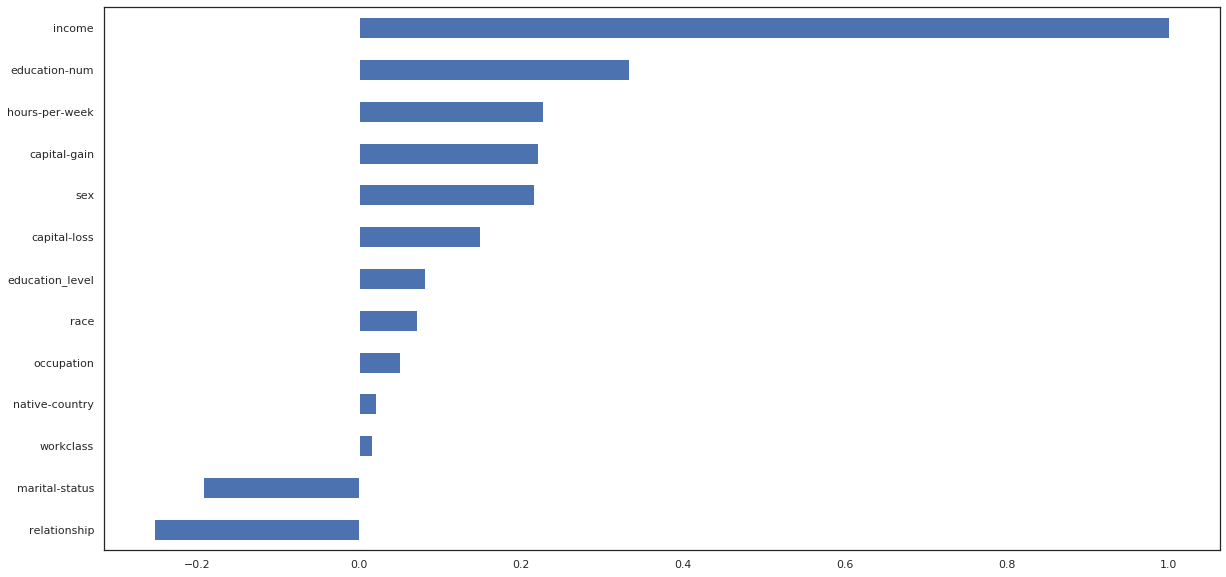

In [94]:
# List of strongly correlated features to churn
new_data.corr().sort_values('income', ascending=False)['income'].plot(kind='barh')
plt.gca().invert_yaxis()

# **FEATURE SELECTION AND TRAIN-TEST SPLIT**


In [0]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [0]:
# write list of features we want to use
features = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country','education-num','capital-gain','capital-loss','hours-per-week'] 

# Set X
X= new_data[features]

In [0]:
# Set y
y = new_data["income"]

In [98]:
X.shape, y.shape

((45222, 12), (45222,))

In [99]:
# kBest feature selection
new_X =  SelectKBest(chi2,k=12).fit_transform(X,y)
X.shape

(45222, 12)

In [100]:
new_X.shape

(45222, 12)

In [0]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.4, random_state = 42)

# **PREDICTIVE ANALYTICS**


#**LOGISTIC REGRESSION**


In [102]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
# feature importance
log_reg.coef_

array([[-9.71480321e-02,  1.76790464e-02, -3.13936554e-01,
        -5.99921709e-03, -2.02676892e-01,  8.60160377e-02,
         8.39652861e-01, -8.09358169e-03,  3.16997683e-01,
         3.27411542e-04,  6.78687434e-04,  2.32354326e-02]])

# **METRICS**



**Accuracy**


In [104]:
log_acc = accuracy_score(y_test, y_pred)
log_acc

0.8214937254685167

**Confusion Matrix**


In [105]:
# confusion matrix
log_cf = confusion_matrix(y_test, y_pred)
log_cf

array([[12895,   741],
       [ 2488,  1965]])

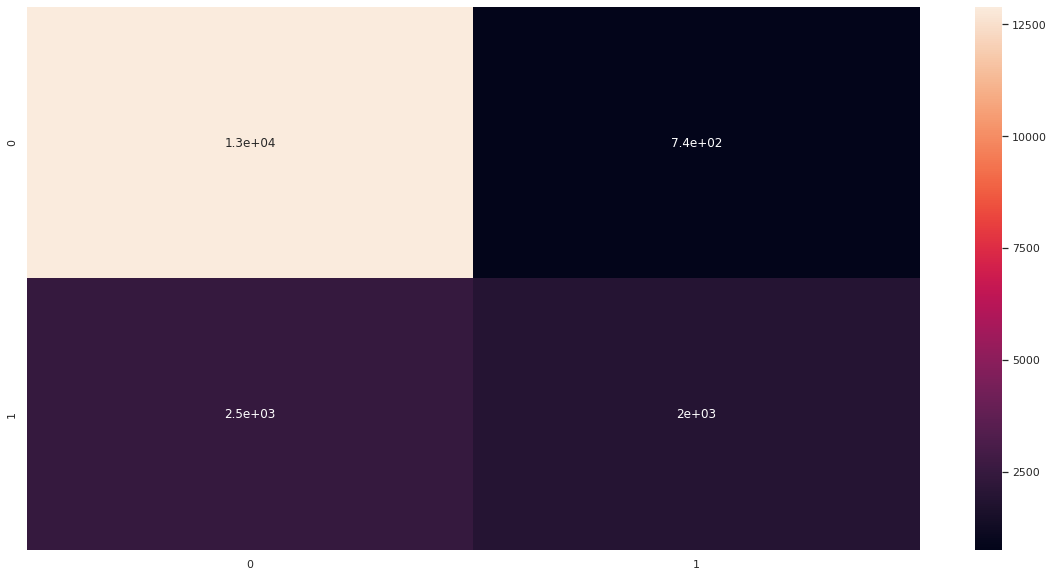

In [106]:
# heatmap of confusion matrix 
sns.heatmap(log_cf, annot = True)

**Precision**


In [0]:
from sklearn.metrics import precision_score

In [108]:
log_ps = precision_score(y_test, y_pred)
log_ps

0.7261640798226164

**Recall**


In [0]:
from sklearn.metrics import recall_score

In [110]:
log_rs = recall_score(y_test, y_pred)
log_rs

0.4412755445766899

**ROC Curve**


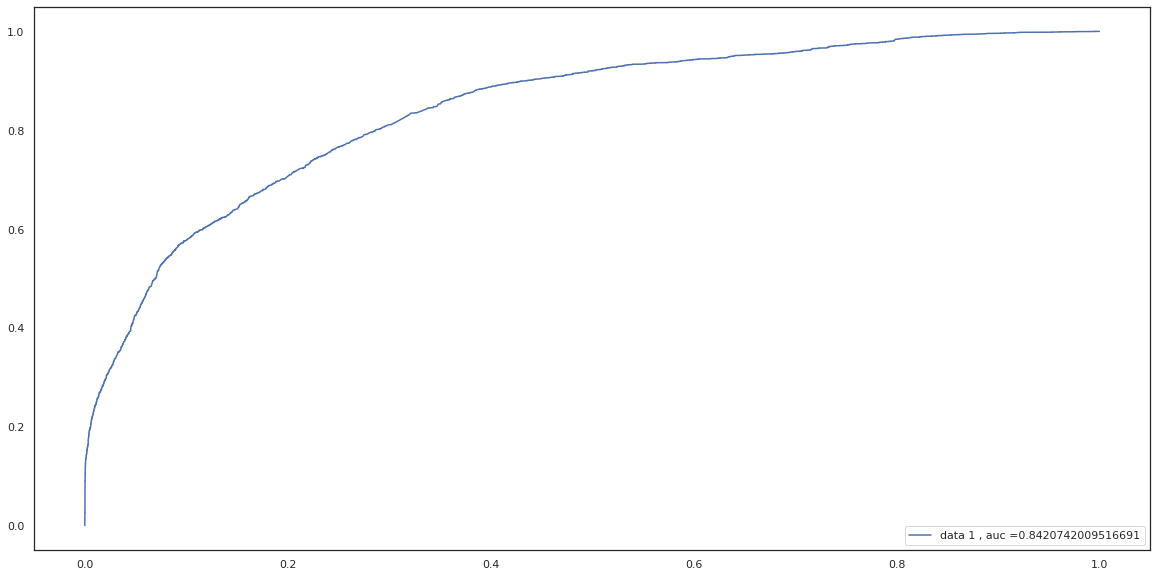

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

# **XG BOOST**

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [114]:
acc_xgb = accuracy_score(y_test, y_pred)
acc_xgb

0.8604676875449168

In [115]:
cf_xgb = confusion_matrix(y_test, y_pred)
cf_xgb

array([[12974,   662],
       [ 1862,  2591]])

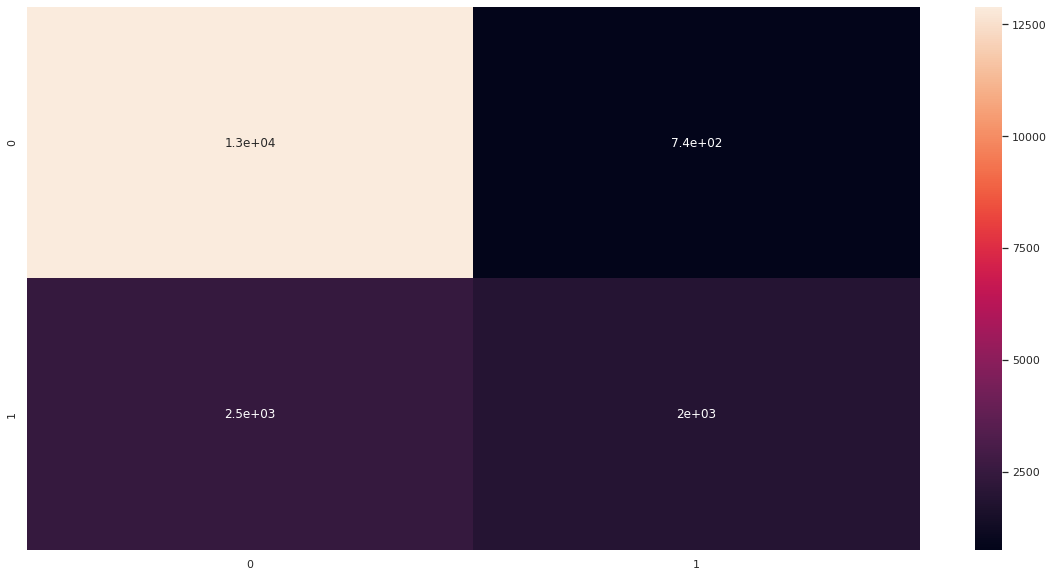

In [116]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

In [117]:
xgb_ps = precision_score(y_test, y_pred)
xgb_ps

0.7964955425760836

In [118]:
xgb_rs = recall_score(y_test, y_pred)
xgb_rs

0.5818549292611722

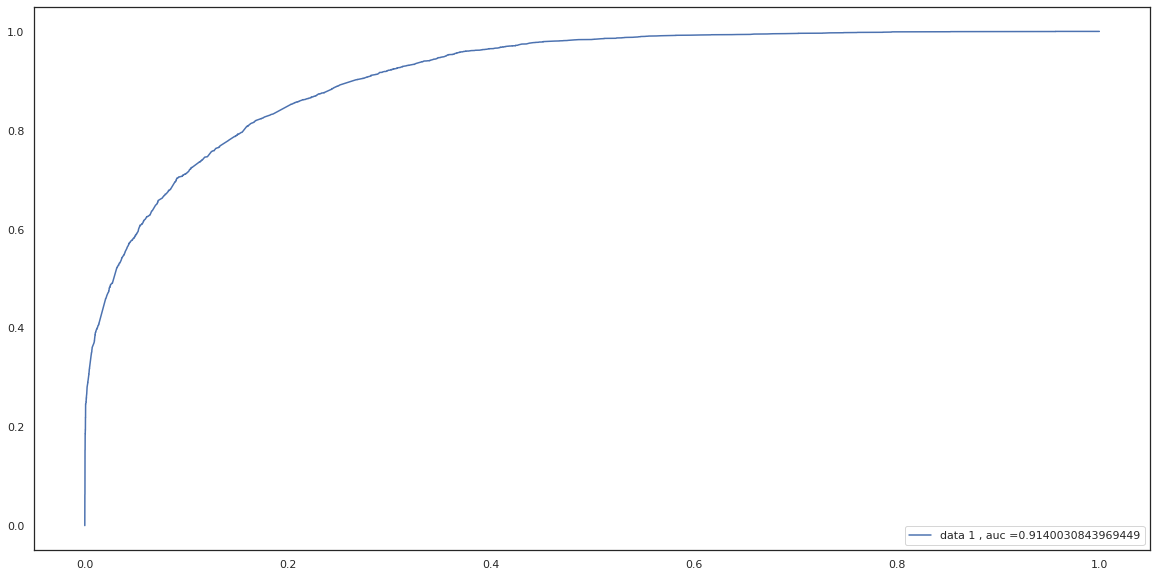

In [119]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

In [120]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)

'              precision    recall  f1-score   support\n\n           0       0.87      0.95      0.91     13636\n           1       0.80      0.58      0.67      4453\n\n    accuracy                           0.86     18089\n   macro avg       0.84      0.77      0.79     18089\nweighted avg       0.86      0.86      0.85     18089\n'

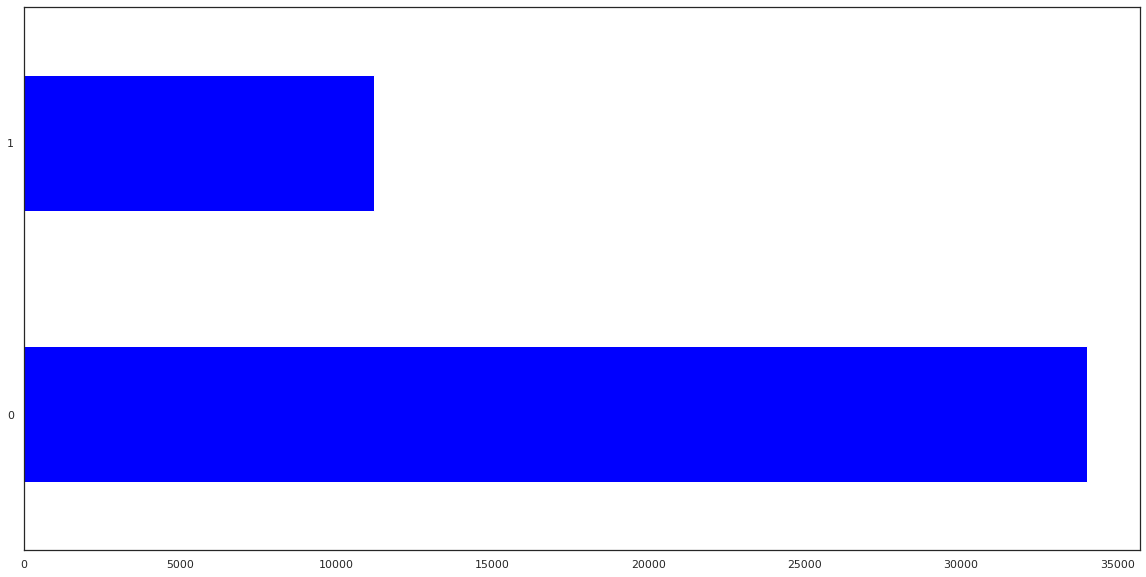

In [121]:
#DISTRIBUTION OF INCOME
new_data.income.value_counts().plot(kind="barh", color="blue")

# **DEALING WITH IMBALANCED DATA**

**Generate Synthetic Samples**

SMOTEing is used to increase accuracy
  - If accuracy of SMOTEd data is almost equal with the original, no need to SMOTE
  - If accuracy of SMOTEd data is lower than the original, no need to SMOTE
  - If accuracy of SMOTEd data is higher than the original, use the SMOTEd data

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample (new_X, y)

In [123]:
from collections import Counter
print(Counter(y).keys())
print(Counter(y).values())

dict_keys([0, 1])
dict_values([34014, 11208])


In [124]:
from collections import Counter
print(Counter(y_res).keys())
print(Counter(y_res).values())

dict_keys([0, 1])
dict_values([34014, 34014])


In [0]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.4, random_state = 42)

In [126]:
# initialize model
log_reg = LogisticRegression()
# fit model
log_reg.fit(X_train, y_train)
# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
s_acc_log = accuracy_score(y_test, y_pred)
s_acc_log

0.735043363222108

In [0]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [129]:
s_acc_xgb = accuracy_score(y_test, y_pred)
s_acc_xgb

0.8507276201675731

#**MODEL ACCURACY COMPARISON** 

In [130]:
ACC = pd.DataFrame((list(zip(["Logistic","XGBoost","Logistic_SMOTEd", "XGBoost_SMOTEd"], [log_acc,acc_xgb,s_acc_log,s_acc_xgb]))), columns = ['Models', 'Accuracy'])
ACC

,Models,Accuracy
0,Logistic,0.821494
1,XGBoost,0.860468
2,Logistic_SMOTEd,0.735043
3,XGBoost_SMOTEd,0.850728


*Since the model accuracy of the SMOTEd data is lower than the accuracy of model of the original data, it is not advisable to use SMOTEing. Instead, just use the original data. :)*

*The accuracy comparison above shows that the XGB model of the original data has the highest accuracy among other models used.*